In this tutorial, we quickly show how to use pytorch to solve simple regression problems. This can serve as a basis for function approximators for Q-learning

In [1]:
%matplotlib notebook

import torch

import numpy as np
import matplotlib as mp
import matplotlib.pylab as plt

<IPython.core.display.Javascript object>


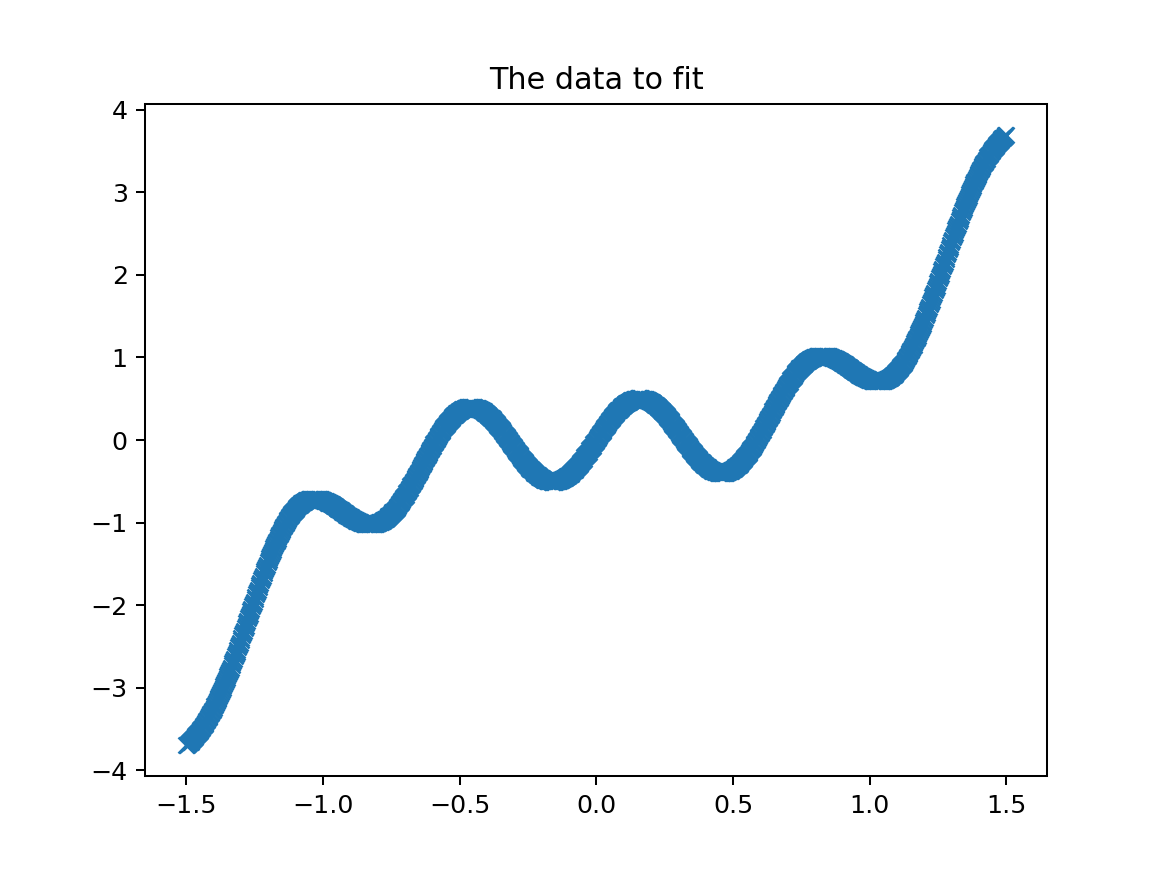

Text(0.5, 1.0, 'The data to fit')

In [2]:
## we create the data  to learn from
N = 1000 # number of data points
x = torch.linspace(-1.5,1.5,steps=N).reshape(N, 1)
y = x**3 + 0.5*torch.sin(10*x)

plt.figure()
plt.plot(x.numpy(),y.numpy(), 'x')
plt.title('The data to fit')

In [3]:
# D_in is input dimension;
# H is dimension of the hidden layers; D_out is output dimension.
batch_size = 32
D_in, H, D_out = 1, 64, 1

# we create a neural network model with 1 hidden layer
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)


# we create a loss function which is the sum of the error square
loss_fn = torch.nn.MSELoss(reduction='sum')

# we define the learning rate and select an optimizer
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# we learn doing 5000 iterations
for t in range(10000):
    # sample a mini batch
    sample_index = torch.tensor(np.random.choice(N, batch_size))
    
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x[sample_index])

    # Compute the least-square loss.
    loss = loss_fn(y_pred, y[sample_index])

    # use the optimizer object to zero all of the gradients for the variables it will update,
    # i.e. the weights of the model. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # compute gradient of the loss with respect to model parameters (backward autodiff)
    loss.backward()

    # call the step function of the optimizer to make one update of the parameters
    optimizer.step()
    
y_pred = model(x)
plt.figure()
plt.plot(x.numpy(),y.numpy(), 'x')
plt.plot(x.numpy(),y_pred.detach().numpy(), 'rx')

<IPython.core.display.Javascript object>


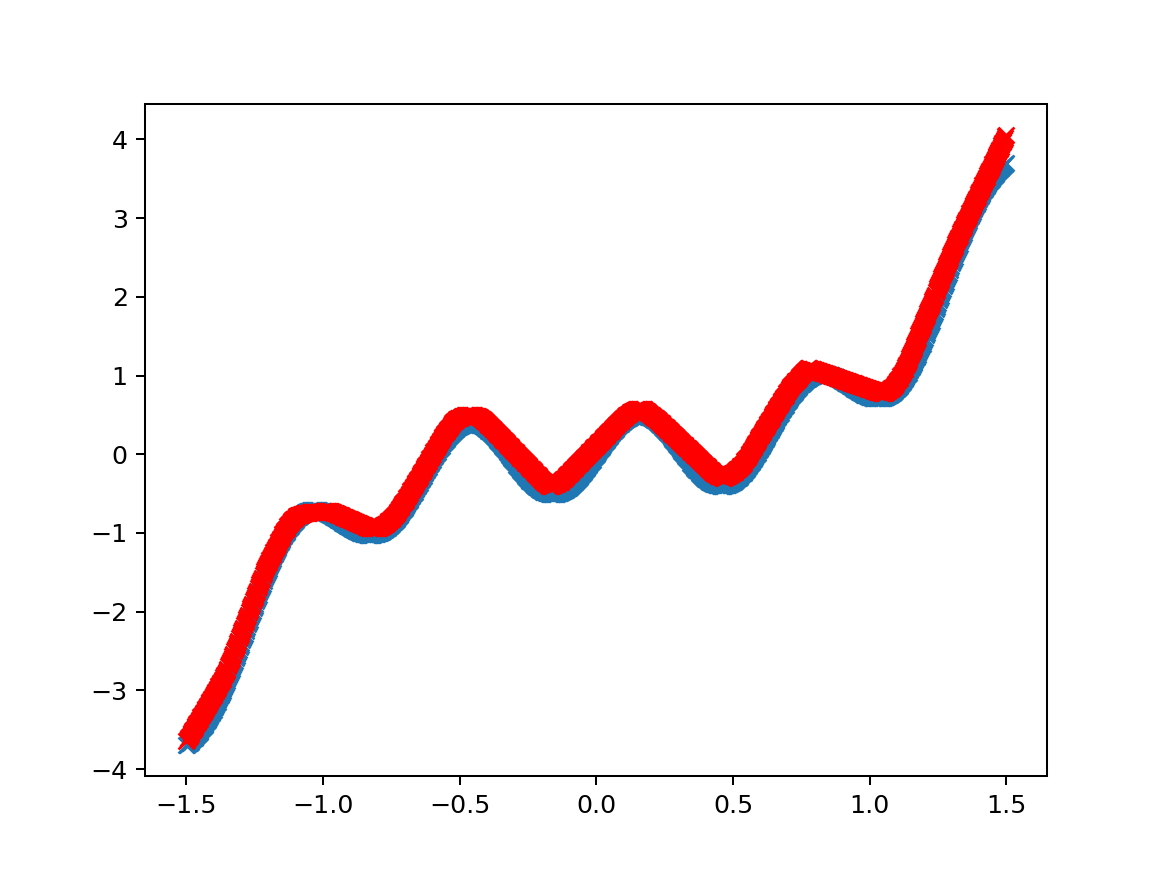

In [6]:
# # we create another model with 3 hidden layers
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# we define the learning rate and select an optimizer
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# we learn doing 5000 iterations
for t in range(10000):
    # sample a mini batch
    sample_index = torch.tensor(np.random.choice(N, batch_size))
    
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x[sample_index])

    # Compute the least-square loss.
    loss = loss_fn(y_pred, y[sample_index])

    # use the optimizer object to zero all of the gradients for the variables it will update,
    # i.e. the weights of the model. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # compute gradient of the loss with respect to model parameters (backward autodiff)
    loss.backward()

    # call the step function of the optimizer to make one update of the parameters
    optimizer.step()
    
y_pred = model(x)
plt.figure()
plt.plot(x.numpy(),y.numpy(), 'x')
plt.plot(x.numpy(),y_pred.detach().numpy(), 'rx')